In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [175]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col='Day', parse_dates=[0])

In [176]:
df.head(5)

,t
Day,
2008-01-01,0
2008-01-02,-5
2008-01-03,-11
2008-01-04,-11
2008-01-05,-12


In [66]:
years = set(df.index.year)
years = sorted(list(years))

С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [67]:
mean_temp_for_years = []
for year in range (2008,2016+1):
    mean_temp_for_years.append(df.loc[f'{year}'].mean())
print(f'самый холодный год: {years[np.argmin(mean_temp_for_years)]}')
print(f'самый теплый год: {years[np.argmax(mean_temp_for_years)]}')

самый холодный год: 2012
самый теплый год: 2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [153]:
days_count = []
for year in years:
    days_count.append(df[(df.index.year == year) & (df.index.month == 1) & (df['t']>=0)].count())
print(years[np.argmax(days_count)])

2008


**3.** В каком году было самое холодное лето (по средней температуре)

In [171]:
mean_summer_temp = []
for year in years:
    mean_summer_temp.append(df[(df.index.year == year) & (df.index.month == (6 or 7 or 8))].mean())
print(f'самое холодное лето было  в : {years[np.argmin(mean_summer_temp)]} году')

самое холодное лето было  в : 2009 году


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [213]:
df['delta_t'] = df['t'] - df['t'].shift(1)
df['delta_t'] = df['delta_t'].apply(abs)
print(df['delta_t'].idxmax())

2014-05-27 00:00:00


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

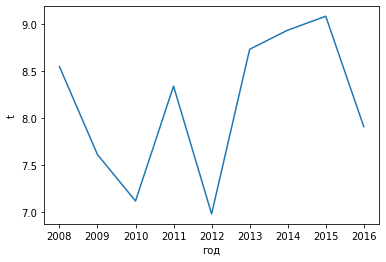

In [229]:
x = years
y = mean_temp_for_years

plt.plot(x,y)
plt.xlabel('год')
plt.ylabel('t')

plt.show()